In [5]:
import pandas as pd   # IMPORTED ALL THE REQUIRED PACKAGES
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import thinkplot
import thinkstats2


df = pd.read_excel('C:\\Users\\Hitesh Sharma\\Desktop\\diabetes.xlsx')

array=df.values
print(array)



[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


In [2]:
# Normal values
#The subcutaneous tissue thickness range in males is from 1.60 mm to 25.45 mm, whereas it is from 3.40 mm to 25.20 mm in females. The subcutaneous tissue thickness increases as the BMI increases
#DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history) Age: Age (years)
#Normal blood sugar levels are less than 100 mg/dL after not eating (fasting) for at least eight hours. And they're less than 140 mg/dL two hours after eating.

#The normal blood glucose level (tested while fasting) for non-diabetics, should be between 3.9 and 7.1 mmol/L (70 to 130 mg/dL). The global mean fasting plasma blood glucose level in humans is about 5.5 mmol/L (100 mg/dL); however, this level fluctuates throughout the day.

In [3]:
df.shape

(768, 9)

In [4]:
df.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10.0,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2.0,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1.0,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1
767,1.0,93.0,70.0,31.000000,79.799479,30.4,0.315,23,0


In [6]:
print(" total number of rows :{0}".format(len(df)))
print(" total number of rows missing glucose :{0}".format(len(df.loc[df['Glucose']==0])))
print(" total number of rows missing insulin:{0}".format(len(df.loc[df['Insulin']==0])))
print(" total number of rows missing age :{0}".format(len(df.loc[df['Age']==0])))
print(" total number of rows missing bmi :{0}".format(len(df.loc[df['BMI']==0])))
print(" total number of rows  missing skin thickness:{0}".format(len(df.loc[df['SkinThickness']==0])))
print(" total number of rows missing pregnancies :{0}".format(len(df.loc[df['Pregnancies']==0])))
print(" total number of rows missing blood pressure :{0}".format(len(df.loc[df['BloodPressure']==0])))
print(" total number of rows  diabetes pedigree function :{0}".format(len(df.loc[df['DiabetesPedigreeFunction']==0])))


 total number of rows :768
 total number of rows missing glucose :0
 total number of rows missing insulin:0
 total number of rows missing age :0
 total number of rows missing bmi :0
 total number of rows  missing skin thickness:0
 total number of rows missing pregnancies :0
 total number of rows missing blood pressure :0
 total number of rows  diabetes pedigree function :0


In [7]:
df1 = df.copy()
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
df1 = df1[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df1.shape

Pregnancies                  4.000000
Glucose                     40.500000
BloodPressure               16.000000
SkinThickness               11.463542
Insulin                     47.450521
BMI                          9.100000
DiabetesPedigreeFunction     0.382500
Age                         17.000000
Outcome                      1.000000
dtype: float64


(611, 9)

In [8]:
df1.var()

Pregnancies                    7.283405
Glucose                      792.850666
BloodPressure                119.713048
SkinThickness                 67.591166
Insulin                     1143.904845
BMI                           38.644735
DiabetesPedigreeFunction       0.059367
Age                          119.740694
Outcome                        0.213995
dtype: float64

In [9]:
df.std()

Pregnancies                  2.984162
Glucose                     30.436016
BloodPressure               12.115932
SkinThickness                9.631241
Insulin                     93.080358
BMI                          6.875374
DiabetesPedigreeFunction     0.331329
Age                         11.760232
Outcome                      0.476951
dtype: float64

In [10]:
df['SkinThickness'].mean()

26.60647922092011

In [11]:
df['Outcome'].mean()

0.3489583333333333

In [12]:
df['Outcome'].max()

1

In [13]:
df=df.dropna()
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin  \
0       6.000000    148.0      72.000000      35.000000   79.799479   
1       1.000000     85.0      66.000000      29.000000   79.799479   
2       8.000000    183.0      64.000000      20.536458   79.799479   
3       1.000000     89.0      66.000000      23.000000   94.000000   
4       3.845052    137.0      40.000000      35.000000  168.000000   
5       5.000000    116.0      74.000000      20.536458   79.799479   
6       3.000000     78.0      50.000000      32.000000   88.000000   
7      10.000000    115.0      69.105469      20.536458   79.799479   
8       2.000000    197.0      70.000000      45.000000  543.000000   
9       8.000000    125.0      96.000000      20.536458   79.799479   
10      4.000000    110.0      92.000000      20.536458   79.799479   
11     10.000000    168.0      74.000000      20.536458   79.799479   
12     10.000000    139.0      80.000000      20.536458   79.799479   
13    

In [14]:
df['Insulin'].max()

846.0

In [15]:
df['BloodPressure'].max()

122.0

In [16]:
df['Glucose'].max()

199.0

In [17]:
df['BMI'].max()

67.1

In [18]:
df['Pregnancies'].max()

17.0

In [19]:
df['Age'].max()

81

In [20]:
df['Age'].mean()

33.240885416666664

In [21]:
df['BMI'].mean()

32.450805155436164

In [22]:
df['Pregnancies'].mean()

4.400782267252609

In [23]:
df['Glucose'].mean()

121.68160502115886

In [24]:
df['Insulin'].mean()

118.66016303168442

In [25]:
df['BloodPressure'].mean()

72.25480651855469

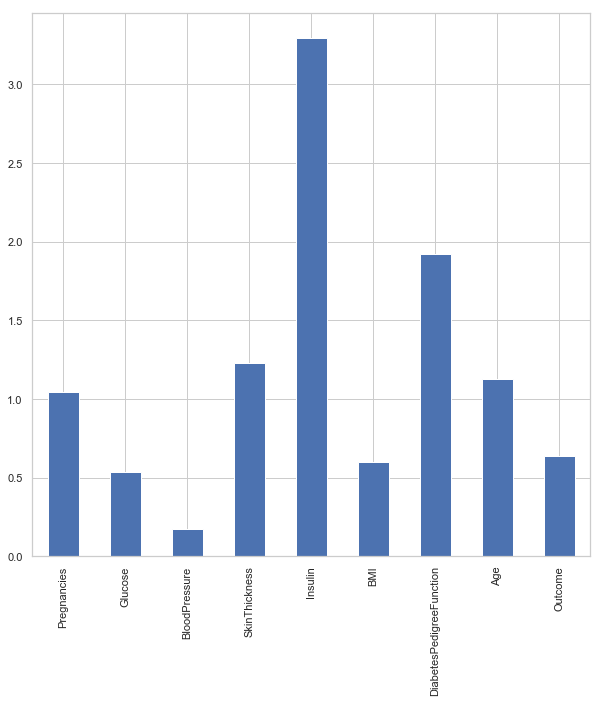

In [205]:
df.skew().plot.bar(figsize=(10,10))

In [26]:
df['BloodPressure'].value_counts()

70.000000     57
74.000000     52
68.000000     45
78.000000     45
72.000000     44
64.000000     43
80.000000     40
76.000000     39
60.000000     37
69.105469     35
62.000000     34
66.000000     30
82.000000     30
88.000000     25
84.000000     23
90.000000     22
58.000000     21
86.000000     21
50.000000     13
56.000000     12
52.000000     11
54.000000     11
92.000000      8
75.000000      8
65.000000      7
85.000000      6
94.000000      6
48.000000      5
96.000000      4
44.000000      4
106.000000     3
100.000000     3
110.000000     3
98.000000      3
30.000000      2
108.000000     2
55.000000      2
46.000000      2
104.000000     2
102.000000     1
95.000000      1
61.000000      1
114.000000     1
24.000000      1
38.000000      1
40.000000      1
122.000000     1
Name: BloodPressure, dtype: int64

In [27]:
df['Insulin'].value_counts()

79.799479     374
105.000000     11
130.000000      9
140.000000      9
120.000000      8
94.000000       7
180.000000      7
100.000000      7
135.000000      6
115.000000      6
110.000000      6
66.000000       5
76.000000       5
56.000000       5
49.000000       5
210.000000      5
160.000000      4
168.000000      4
64.000000       4
88.000000       4
125.000000      4
71.000000       4
90.000000       4
200.000000      4
54.000000       4
155.000000      4
165.000000      4
190.000000      4
92.000000       3
175.000000      3
             ... 
196.000000      1
81.000000       1
72.000000       1
84.000000       1
89.000000       1
43.000000       1
108.000000      1
73.000000       1
52.000000       1
68.000000       1
188.000000      1
166.000000      1
415.000000      1
600.000000      1
271.000000      1
545.000000      1
112.000000      1
16.000000       1
127.000000      1
178.000000      1
392.000000      1
22.000000       1
440.000000      1
46.000000       1
91.000000 

In [28]:
df['Pregnancies'].value_counts()

1.000000     135
3.845052     111
2.000000     103
3.000000      75
4.000000      68
5.000000      57
6.000000      50
7.000000      45
8.000000      38
9.000000      28
10.000000     24
11.000000     11
13.000000     10
12.000000      9
14.000000      2
15.000000      1
17.000000      1
Name: Pregnancies, dtype: int64

In [29]:
df['SkinThickness'].value_counts()

20.536458    227
32.000000     31
30.000000     27
27.000000     23
23.000000     22
33.000000     20
18.000000     20
28.000000     20
31.000000     19
19.000000     18
39.000000     18
29.000000     17
40.000000     16
37.000000     16
25.000000     16
22.000000     16
26.000000     16
41.000000     15
35.000000     15
36.000000     14
17.000000     14
15.000000     14
20.000000     13
24.000000     12
42.000000     11
13.000000     11
21.000000     10
34.000000      8
46.000000      8
38.000000      7
12.000000      7
11.000000      6
14.000000      6
43.000000      6
16.000000      6
45.000000      6
10.000000      5
44.000000      5
47.000000      4
48.000000      4
50.000000      3
49.000000      3
7.000000       2
52.000000      2
8.000000       2
54.000000      2
51.000000      1
99.000000      1
60.000000      1
56.000000      1
63.000000      1
Name: SkinThickness, dtype: int64

In [30]:
df['BMI'].value_counts()

32.000000    13
31.200000    12
31.600000    12
31.992578    11
33.300000    10
32.400000    10
32.900000     9
30.800000     9
32.800000     9
30.100000     9
34.200000     8
29.700000     8
33.600000     8
39.400000     7
27.600000     7
25.900000     7
33.200000     7
35.500000     7
30.500000     7
30.000000     7
30.400000     7
27.800000     7
28.700000     7
25.000000     6
28.900000     6
25.200000     6
32.500000     6
36.800000     6
38.500000     6
34.900000     6
             ..
21.700000     1
21.200000     1
43.100000     1
45.400000     1
40.700000     1
45.200000     1
24.100000     1
44.100000     1
29.200000     1
38.600000     1
67.100000     1
41.200000     1
26.700000     1
48.800000     1
49.600000     1
46.700000     1
42.800000     1
22.700000     1
24.900000     1
40.800000     1
57.300000     1
31.100000     1
53.200000     1
46.300000     1
36.200000     1
32.100000     1
52.900000     1
31.300000     1
45.700000     1
41.800000     1
Name: BMI, Length: 248, 

In [31]:
df['Age'].value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
32    16
36    16
38    16
45    15
34    14
40    13
43    13
46    13
39    12
35    10
50     8
44     8
51     8
52     8
58     7
47     6
54     6
57     5
60     5
48     5
49     5
53     5
55     4
62     4
63     4
66     4
56     3
59     3
65     3
67     3
61     2
69     2
72     1
64     1
68     1
70     1
81     1
Name: Age, dtype: int64

In [32]:
df[df['Age']>30].count()[0]

351

In [33]:
df[df['BloodPressure']>70].count()[0]

393

In [34]:
df[df['Insulin']>35].count()[0]

757

In [35]:
df[df['BloodPressure']>120].count()[0]

1

In [36]:
df[df['BMI']>25].count()[0]

656

In [37]:
df['Age'].value_counts().head(5)



22    72
21    63
25    48
24    46
23    38
Name: Age, dtype: int64

In [38]:
df['Insulin'].value_counts().head(5)



79.799479     374
105.000000     11
130.000000      9
140.000000      9
120.000000      8
Name: Insulin, dtype: int64

In [39]:
df['BloodPressure'].value_counts().head(5)



70.0    57
74.0    52
68.0    45
78.0    45
72.0    44
Name: BloodPressure, dtype: int64

In [40]:
df['BMI'].value_counts().head(5)



32.000000    13
31.200000    12
31.600000    12
31.992578    11
33.300000    10
Name: BMI, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025E3D6A5470>]],
      dtype=object)

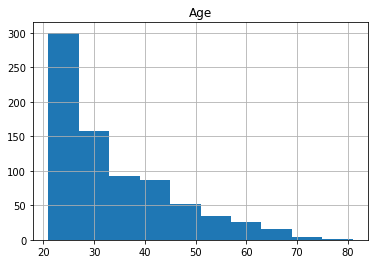

In [41]:
df.hist(column='Age')



In [42]:
# VALIDATE
df.Age.value_counts().sort_index()

21    63
22    72
23    38
24    46
25    48
26    33
27    32
28    35
29    29
30    21
31    24
32    16
33    17
34    14
35    10
36    16
37    19
38    16
39    12
40    13
41    22
42    18
43    13
44     8
45    15
46    13
47     6
48     5
49     5
50     8
51     8
52     8
53     5
54     6
55     4
56     3
57     5
58     7
59     3
60     5
61     2
62     4
63     4
64     1
65     3
66     4
67     3
68     1
69     2
70     1
72     1
81     1
Name: Age, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025E3D720F98>]],
      dtype=object)

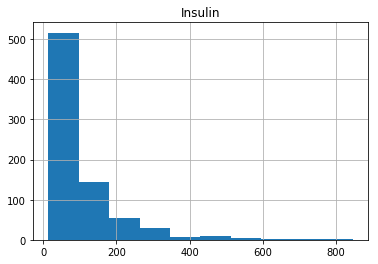

In [43]:
df.hist(column='Insulin')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025E3DABBC88>]],
      dtype=object)

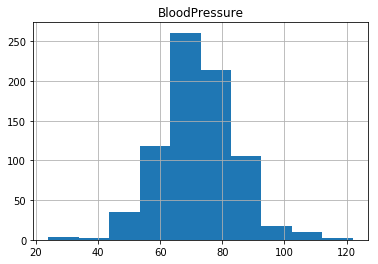

In [44]:
df.hist(column='BloodPressure')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025E3DB2A470>]],
      dtype=object)

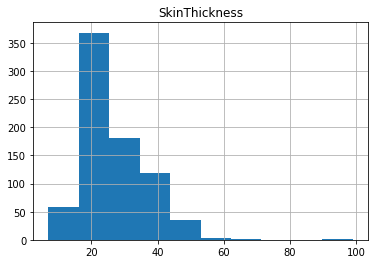

In [45]:
df.hist(column='SkinThickness')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025E3DA93518>]],
      dtype=object)

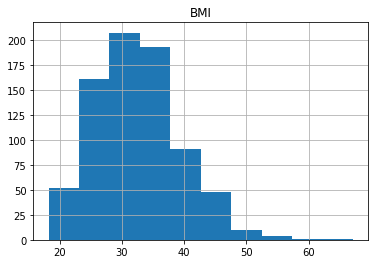

In [46]:
df.hist(column='BMI')

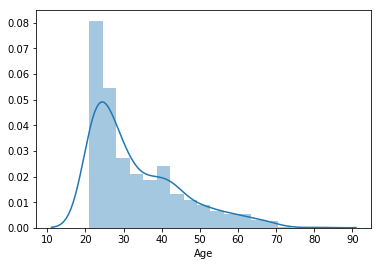

In [47]:
sns.distplot(df['Age'])
# The distplot shows the distribution of a univariate set of observations

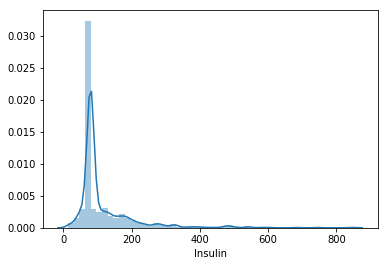

In [48]:
sns.distplot(df['Insulin'])
# The distplot shows the distribution of a univariate set of observations

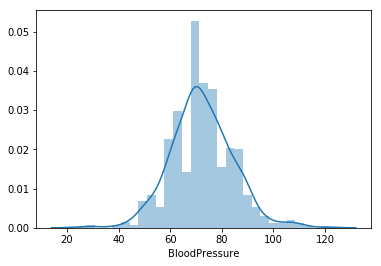

In [49]:
sns.distplot(df['BloodPressure'])
# The distplot shows the distribution of a univariate set of observations

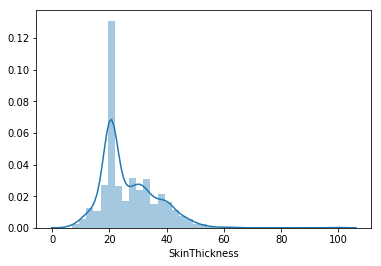

In [50]:
sns.distplot(df['SkinThickness'])
# The distplot shows the distribution of a univariate set of observations

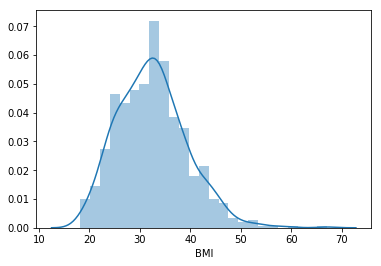

In [51]:
sns.distplot(df['BMI'])
# The distplot shows the distribution of a univariate set of observations

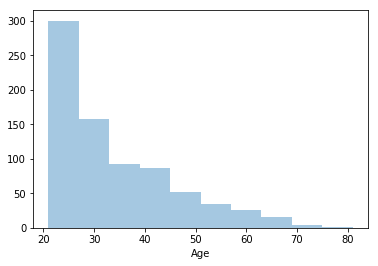

In [52]:
sns.distplot(df['Age'],kde=False,bins=10)
#To remove the kde layer and just have the histogram use:

In [ ]:
sns.distplot(df['Age'],kde=True)

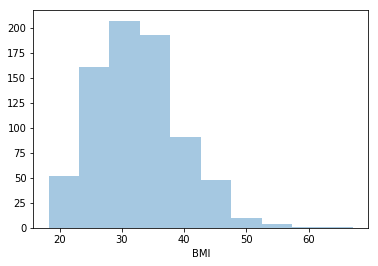

In [53]:
sns.distplot(df['BMI'],kde=False,bins=10)
#To remove the kde layer and just have the histogram use:

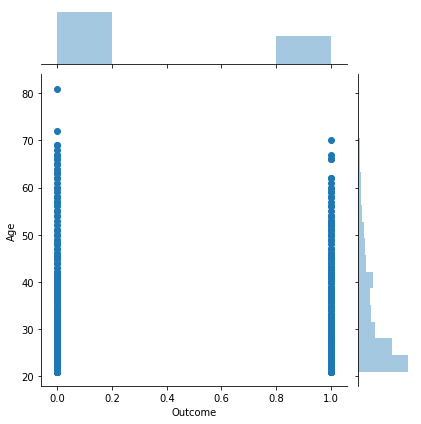

In [54]:
sns.jointplot(x='Outcome',y='Age',data=df,kind='scatter')
#jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what kind parameter to compare with:



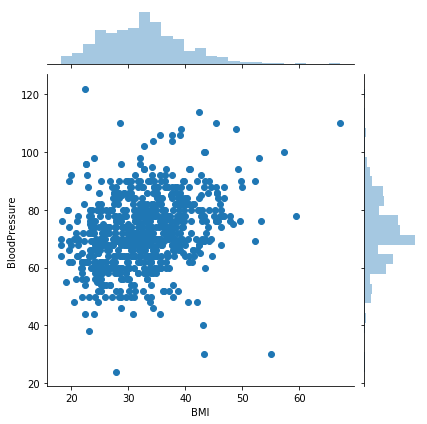

In [55]:
sns.jointplot(x='BMI',y='BloodPressure',data=df,kind='scatter')
#jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what kind parameter to compare with:



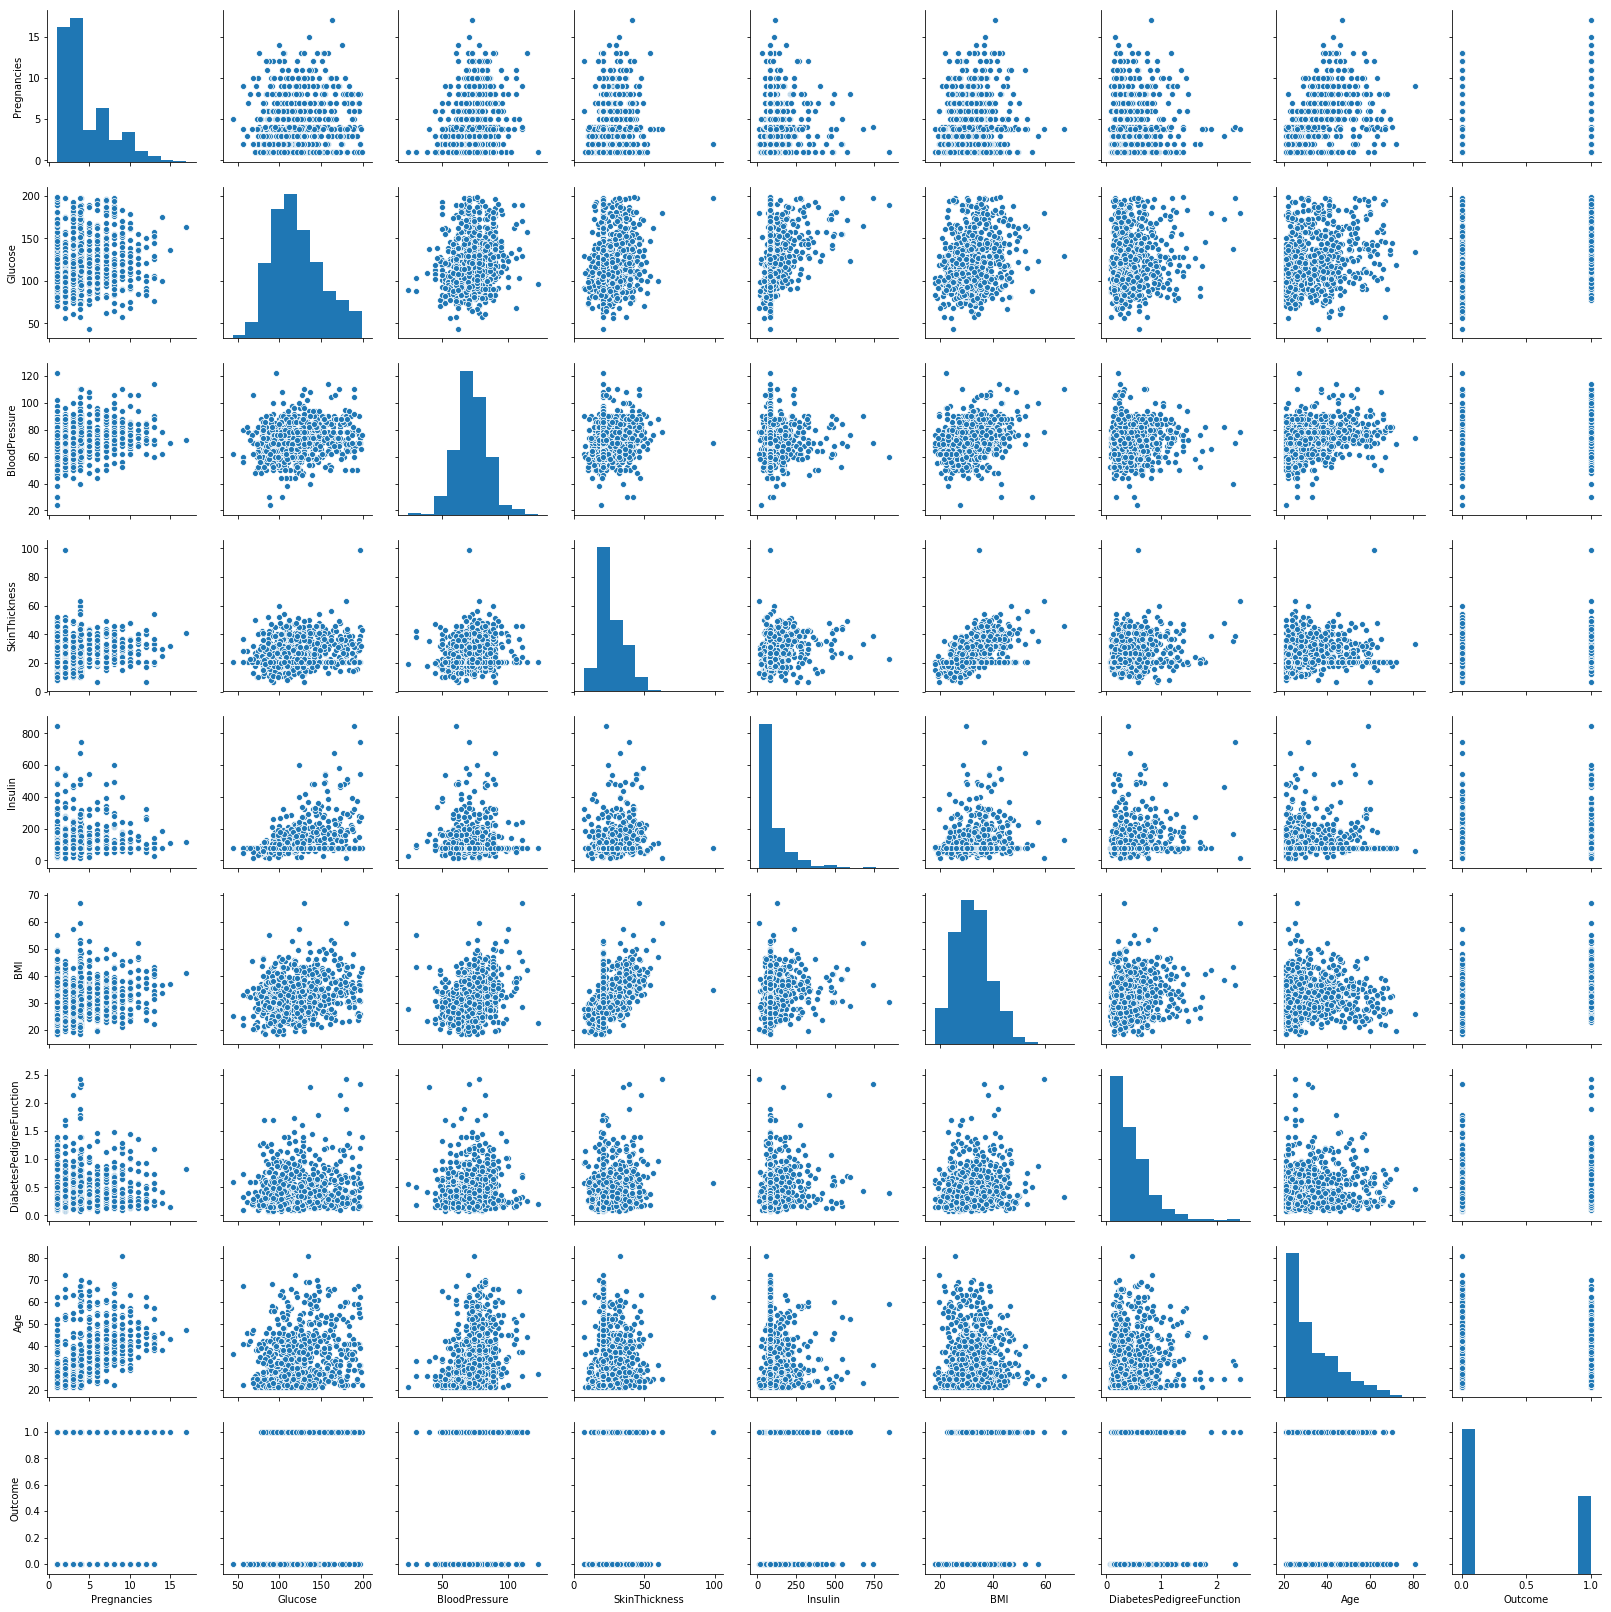

In [56]:
# pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns).

sns.pairplot(df)

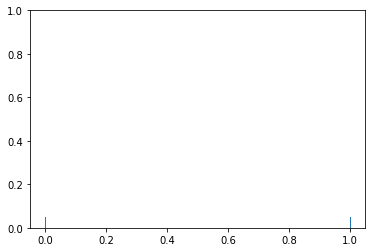

In [57]:
#rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:


sns.rugplot(df['Outcome'])

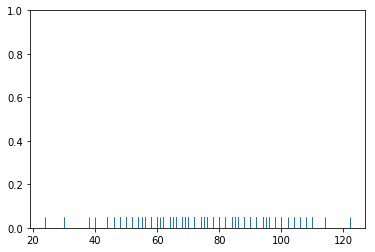

In [58]:
#rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:


sns.rugplot(df['BloodPressure'])

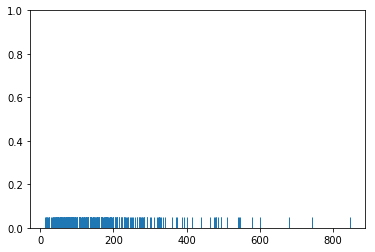

In [59]:
#rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:


sns.rugplot(df['Insulin'])

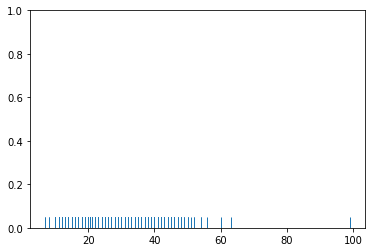

In [60]:
#rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:


sns.rugplot(df['SkinThickness'])

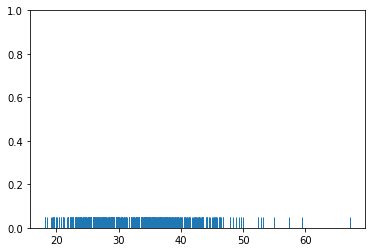

In [61]:
#rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:


sns.rugplot(df['BMI'])

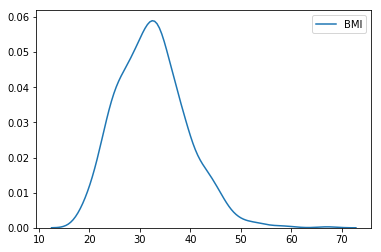

In [62]:
sns.kdeplot(df['BMI'])


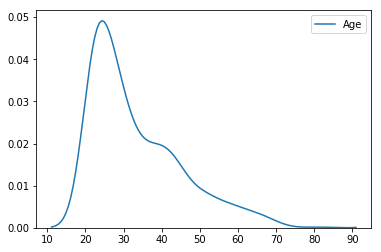

In [63]:
sns.kdeplot(df['Age'])


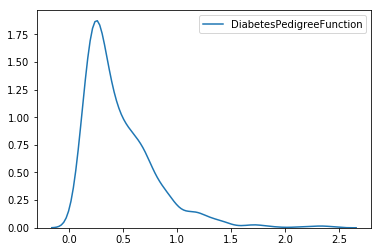

In [64]:
sns.kdeplot(df['DiabetesPedigreeFunction'])


In [65]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


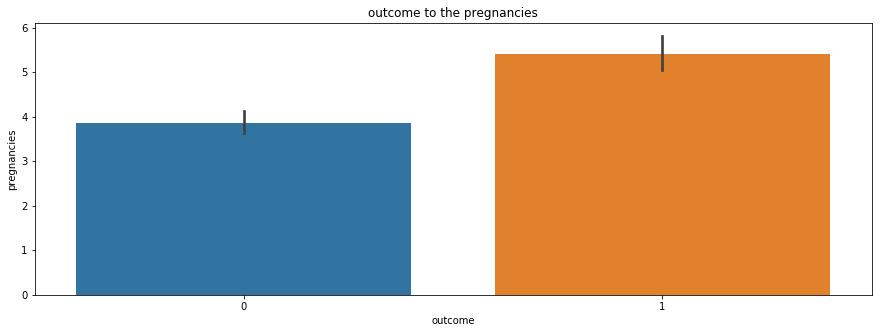

In [66]:
plt.figure(figsize = (15,5))
sns.barplot(x=df['Outcome'],y=df['Pregnancies'])
plt.xlabel('outcome')
plt.ylabel('pregnancies')
plt.title('outcome to the pregnancies');

In [67]:
df.skew()

Pregnancies                 1.041865
Glucose                     0.533225
BloodPressure               0.173050
SkinThickness               1.226670
Insulin                     3.291825
BMI                         0.601103
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

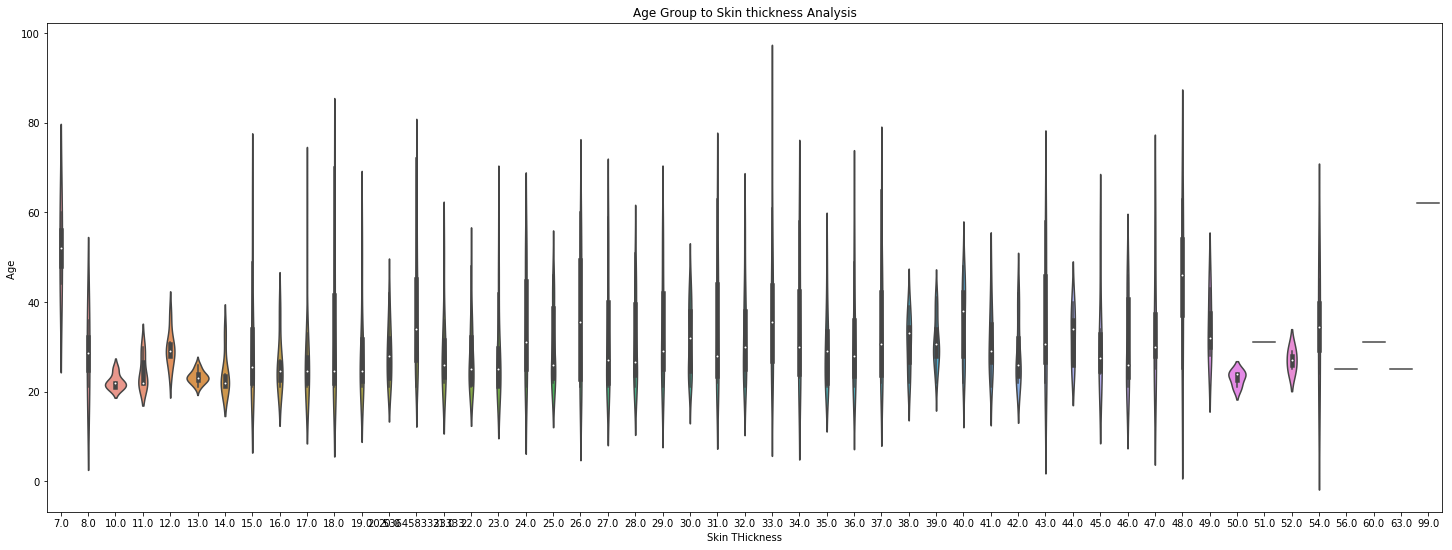

In [68]:
plt.figure(figsize = (25,9))
sns.violinplot(x=df['SkinThickness'],y=df['Age'])
plt.xlabel('Skin THickness')
plt.ylabel('Age ')
plt.title('Age Group to Skin thickness Analysis');

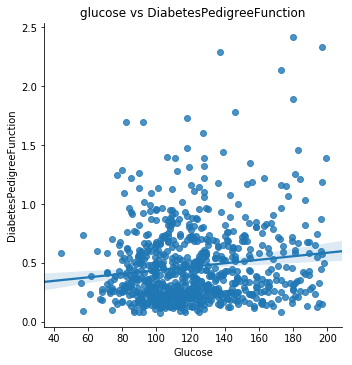

In [69]:
sns.lmplot(x="Glucose", y="DiabetesPedigreeFunction",data=df,)
plt.title('glucose vs DiabetesPedigreeFunction');

In [70]:
df.median()

Pregnancies                   3.845052
Glucose                     117.000000
BloodPressure                72.000000
SkinThickness                23.000000
Insulin                      79.799479
BMI                          32.000000
DiabetesPedigreeFunction      0.372500
Age                          29.000000
Outcome                       0.000000
dtype: float64

In [132]:
df.mode()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,99.0,70.0,20.536458,79.799479,32.0,0.254,22.0,0.0
1,NaN,100.0,NaN,NaN,NaN,NaN,0.258,NaN,NaN


In [71]:
df.var()

Pregnancies                    8.905220
Glucose                      926.351048
BloodPressure                146.795798
SkinThickness                 92.760798
Insulin                     8663.952981
BMI                           47.270761
DiabetesPedigreeFunction       0.109779
Age                          138.303046
Outcome                        0.227483
dtype: float64

In [72]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [73]:
print('Data Shape :')
df.shape

Data Shape :


(768, 9)

In [74]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

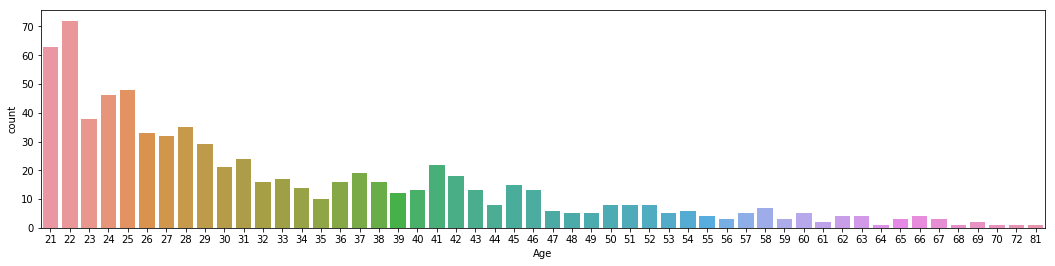

In [75]:
plt.figure(figsize=(18,4))
sns.countplot(df.Age)
plt.show()


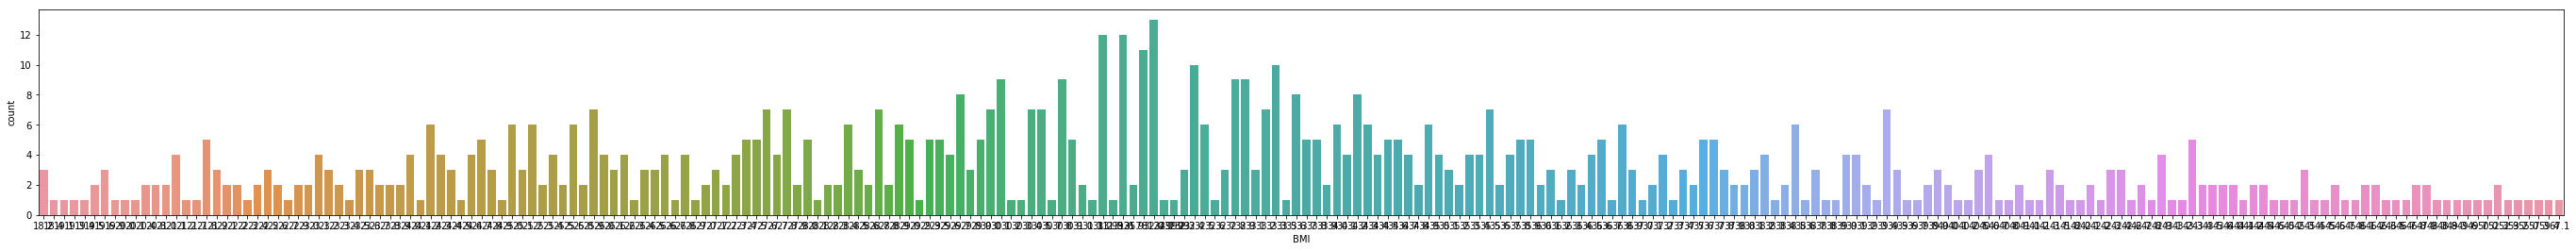

In [76]:
plt.figure(figsize=(48,4))
sns.countplot(df.BMI)
plt.show()


In [77]:
df['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68], dtype=int64)

In [78]:
df['BMI'].unique()

array([33.6       , 26.6       , 23.3       , 28.1       , 43.1       ,
       25.6       , 31.        , 35.3       , 30.5       , 31.99257812,
       37.6       , 38.        , 27.1       , 30.1       , 25.8       ,
       30.        , 45.8       , 29.6       , 43.3       , 34.6       ,
       39.3       , 35.4       , 39.8       , 29.        , 36.6       ,
       31.1       , 39.4       , 23.2       , 22.2       , 34.1       ,
       36.        , 31.6       , 24.8       , 19.9       , 27.6       ,
       24.        , 33.2       , 32.9       , 38.2       , 37.1       ,
       34.        , 40.2       , 22.7       , 45.4       , 27.4       ,
       42.        , 29.7       , 28.        , 39.1       , 19.4       ,
       24.2       , 24.4       , 33.7       , 34.7       , 23.        ,
       37.7       , 46.8       , 40.5       , 41.5       , 25.        ,
       25.4       , 32.8       , 32.5       , 42.7       , 19.6       ,
       28.9       , 28.6       , 43.4       , 35.1       , 32.  

In [79]:
df['BloodPressure'].unique()

array([ 72.        ,  66.        ,  64.        ,  40.        ,
        74.        ,  50.        ,  69.10546875,  70.        ,
        96.        ,  92.        ,  80.        ,  60.        ,
        84.        ,  30.        ,  88.        ,  90.        ,
        94.        ,  76.        ,  82.        ,  75.        ,
        58.        ,  78.        ,  68.        , 110.        ,
        56.        ,  62.        ,  85.        ,  86.        ,
        48.        ,  44.        ,  65.        , 108.        ,
        55.        , 122.        ,  54.        ,  52.        ,
        98.        , 104.        ,  95.        ,  46.        ,
       102.        , 100.        ,  61.        ,  24.        ,
        38.        , 106.        , 114.        ])

In [80]:
df['SkinThickness'].unique()

array([35.        , 29.        , 20.53645833, 23.        , 32.        ,
       45.        , 19.        , 47.        , 38.        , 30.        ,
       41.        , 33.        , 26.        , 15.        , 36.        ,
       11.        , 31.        , 37.        , 42.        , 25.        ,
       18.        , 24.        , 39.        , 27.        , 21.        ,
       34.        , 10.        , 60.        , 13.        , 20.        ,
       22.        , 28.        , 54.        , 40.        , 51.        ,
       56.        , 14.        , 17.        , 50.        , 44.        ,
       12.        , 46.        , 16.        ,  7.        , 52.        ,
       43.        , 48.        ,  8.        , 49.        , 63.        ,
       99.        ])

In [81]:
df['Insulin'].unique()

array([ 79.79947917,  94.        , 168.        ,  88.        ,
       543.        , 846.        , 175.        , 230.        ,
        83.        ,  96.        , 235.        , 146.        ,
       115.        , 140.        , 110.        , 245.        ,
        54.        , 192.        , 207.        ,  70.        ,
       240.        ,  82.        ,  36.        ,  23.        ,
       300.        , 342.        , 304.        , 142.        ,
       128.        ,  38.        , 100.        ,  90.        ,
       270.        ,  71.        , 125.        , 176.        ,
        48.        ,  64.        , 228.        ,  76.        ,
       220.        ,  40.        , 152.        ,  18.        ,
       135.        , 495.        ,  37.        ,  51.        ,
        99.        , 145.        , 225.        ,  49.        ,
        50.        ,  92.        , 325.        ,  63.        ,
       284.        , 119.        , 204.        , 155.        ,
       485.        ,  53.        , 114.        , 105.  

In [82]:
print("Max : ",max(df['SkinThickness'].unique()))
print('Min : ',min(df['SkinThickness'].unique()))

Max :  99.0
Min :  7.0


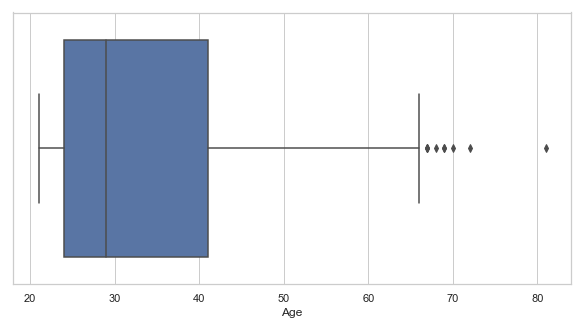

In [83]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
sns.boxplot(df['Age'])
plt.show()

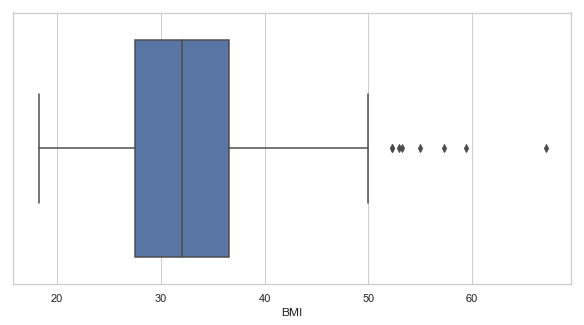

In [84]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
sns.boxplot(df['BMI'])
plt.show()

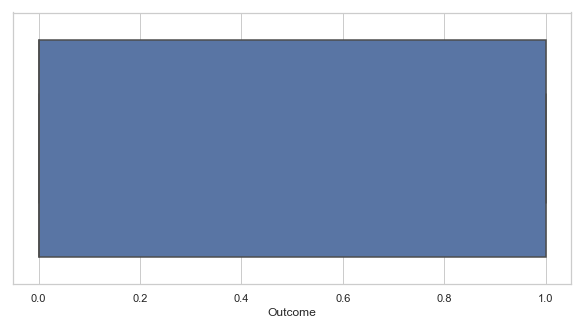

In [85]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
sns.boxplot(df['Outcome'])
plt.show()

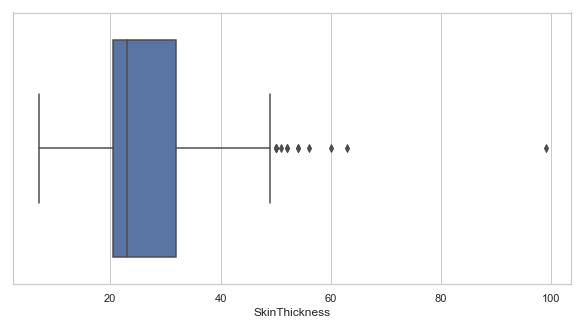

In [86]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
sns.boxplot(df['SkinThickness'])
plt.show()

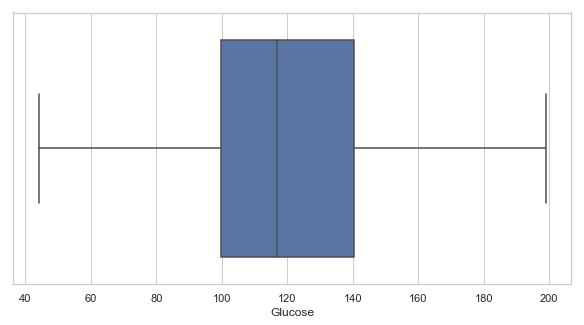

In [87]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
sns.boxplot(df['Glucose'])
plt.show()

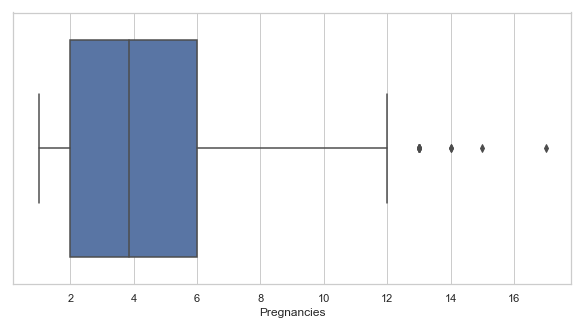

In [88]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
sns.boxplot(df['Pregnancies'])
plt.show()

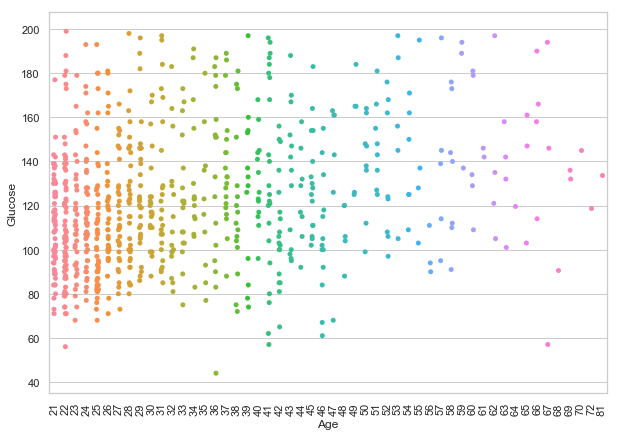

In [133]:
plt.figure(figsize=(10,7))
sns.stripplot(x="Age",y='Glucose',data=df)
plt.xticks(rotation=90)
plt.show()


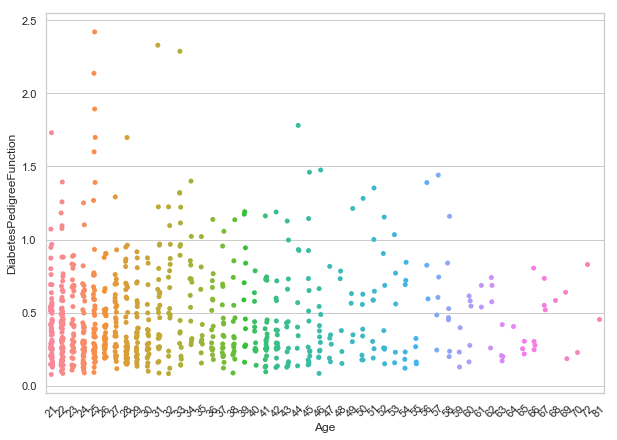

In [136]:
plt.figure(figsize=(10,7))
sns.stripplot(x="Age",y='DiabetesPedigreeFunction',data=df)
plt.xticks(rotation=45)
plt.show()


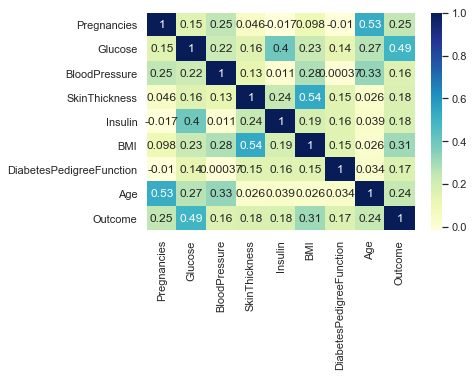

In [138]:
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)
plt.show()

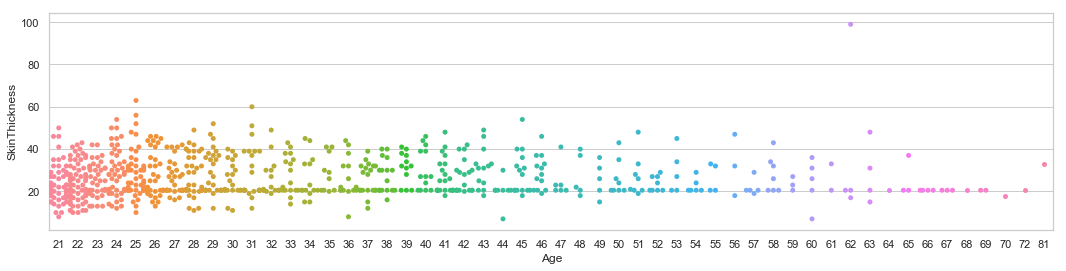

In [92]:
plt.figure(figsize=(18,4))
sns.swarmplot(x="Age", y="SkinThickness", data=df)

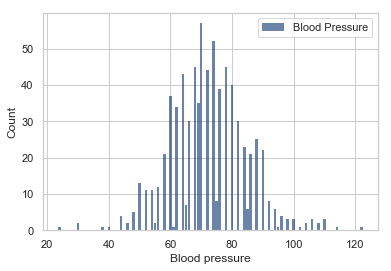

In [93]:
hist = thinkstats2.Hist(df['BloodPressure'], label='Blood Pressure')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Blood pressure', ylabel='Count')

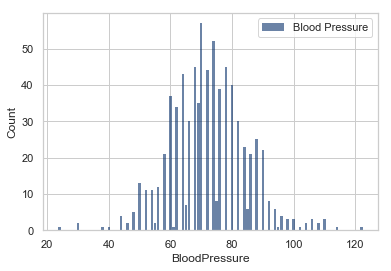

In [94]:
pmf = hist.Copy()
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='BloodPressure', ylabel='Count')

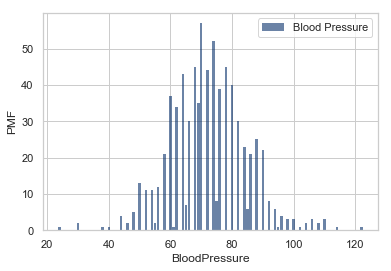

In [95]:
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='BloodPressure', ylabel='PMF')

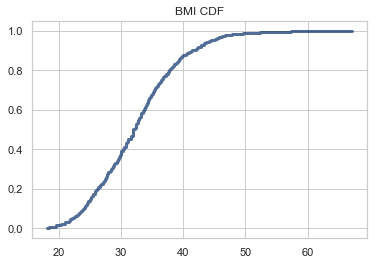

In [96]:
BMI_cdf = thinkstats2.Cdf(df['BMI'])
thinkplot.Cdf(BMI_cdf)
plt.title('BMI CDF');

In [97]:
present = df[df['Outcome']==1]
BloodPressure = present['BloodPressure']
mean, std = BloodPressure.mean(), BloodPressure.std()
mean, std

(74.95032649253731, 12.016571999598154)

In [98]:
pdf = thinkstats2.NormalPdf(mean, std)
pdf.Density(mean + std)

0.02013641864978091

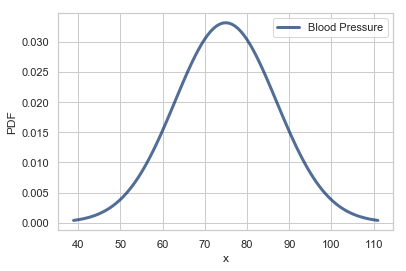

In [99]:
thinkplot.Pdf(pdf, label='Blood Pressure')
thinkplot.Config(xlabel='x', ylabel='PDF')

In [100]:
samples_geometric = np.random.geometric(p=0.1, size=int(1e6))

In [101]:
samples_geometric_pmf = thinkstats2.Pmf(samples_geometric)

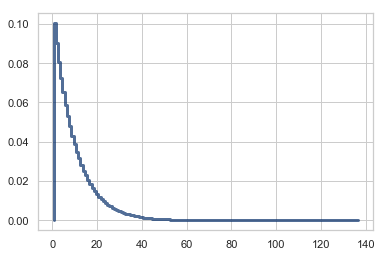

In [102]:
thinkplot.Pmf(samples_geometric_pmf)

In [103]:
samples_geometric_cdf = samples_geometric_pmf.MakeCdf()

{'xscale': 'linear', 'yscale': 'linear'}

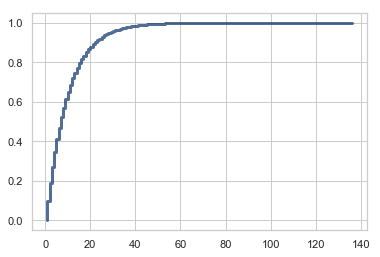

In [104]:
thinkplot.Cdf(samples_geometric_cdf)

In [105]:
samples_geometric_cdf.Prob(40)

0.985219

In [106]:
samples_geometric_cdf.Mean()

9.99294999999999

In [107]:
samples_geometric_pmf.Mean()

9.99295

In [108]:
samples_geometric_pmf.Var()

89.96943029749993

In [109]:
sample_binomial = np.random.binomial(n = 5, p = 0.25, size = int(1e6))

In [110]:
sample_binomial_pmf = thinkstats2.Pmf(sample_binomial)

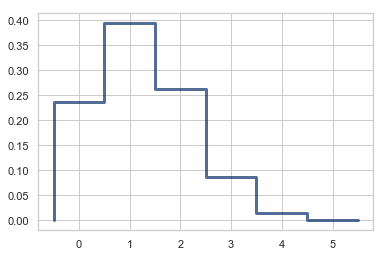

In [111]:
thinkplot.Pmf(sample_binomial_pmf)

In [112]:
sample_poisson = np.random.poisson(lam = 3.4, size = int(1e6))

In [113]:
sample_poisson_pmf = thinkstats2.Pmf(sample_poisson)

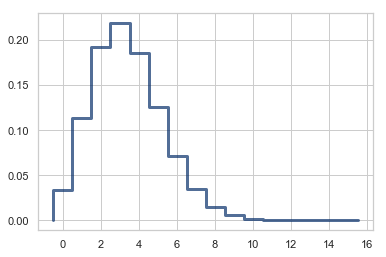

In [114]:
thinkplot.Pmf(sample_poisson_pmf)

In [115]:
pmf = hist.Copy()


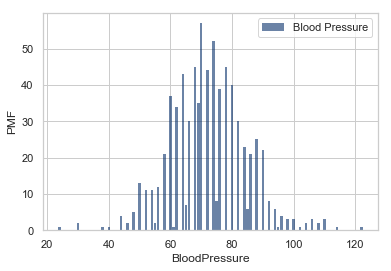

In [116]:
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='BloodPressure', ylabel='PMF')

In [117]:
from scipy.stats import kurtosis, skew
print('kurtosis of Age: {}'.format(kurtosis(df['Age'])))
print('skewness of Age: {}'.format(skew(df['Age'])))


kurtosis of Age: 0.6311769413798585
skewness of Age: 1.127389259531697


In [118]:
# scikit-learn bootstrap
from sklearn.utils import resample

In [119]:
means = []

i=0

#confidence interval shrinks with more samples
while i<10000:
    means.append(resample(df, replace=True, n_samples=len(df)).mean())
    i+=1

In [120]:
df_means = pd.DataFrame(means)

In [140]:
df_means.sort_values(by='BMI', inplace=True)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1808,4.368854,120.804138,71.895569,25.982178,122.851047,31.645587,0.468393,32.989583,0.316406
8432,4.513073,121.779399,71.355957,26.042616,119.282308,31.655864,0.455590,33.223958,0.359375
3034,4.391264,121.812088,71.986374,25.994527,118.030453,31.667062,0.467021,33.368490,0.354167
6101,4.437956,122.188115,71.275436,25.734653,113.714318,31.667833,0.451349,33.407552,0.343750
1054,4.394382,122.510005,72.205531,26.234877,116.864332,31.681163,0.450977,33.602865,0.315104
7793,4.233822,121.271449,71.592255,26.166789,119.457825,31.684761,0.472796,32.895833,0.335938
7641,4.399187,119.998764,72.053874,26.255202,110.884891,31.704422,0.479523,32.440104,0.328125
6463,4.324473,120.414815,72.288661,26.073703,112.511712,31.707996,0.463081,33.385417,0.341146
8250,4.243927,118.729919,71.409963,25.896240,117.895850,31.710653,0.488526,32.526042,0.338542
8791,4.370945,120.507263,72.039485,25.815002,117.443495,31.720958,0.461150,33.554688,0.305990


In [122]:
df_means

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1808,4.368854,120.804138,71.895569,25.982178,122.851047,31.645587,0.468393,32.989583,0.316406
8432,4.513073,121.779399,71.355957,26.042616,119.282308,31.655864,0.455590,33.223958,0.359375
3034,4.391264,121.812088,71.986374,25.994527,118.030453,31.667062,0.467021,33.368490,0.354167
6101,4.437956,122.188115,71.275436,25.734653,113.714318,31.667833,0.451349,33.407552,0.343750
1054,4.394382,122.510005,72.205531,26.234877,116.864332,31.681163,0.450977,33.602865,0.315104
7793,4.233822,121.271449,71.592255,26.166789,119.457825,31.684761,0.472796,32.895833,0.335938
7641,4.399187,119.998764,72.053874,26.255202,110.884891,31.704422,0.479523,32.440104,0.328125
6463,4.324473,120.414815,72.288661,26.073703,112.511712,31.707996,0.463081,33.385417,0.341146
8250,4.243927,118.729919,71.409963,25.896240,117.895850,31.710653,0.488526,32.526042,0.338542
8791,4.370945,120.507263,72.039485,25.815002,117.443495,31.720958,0.461150,33.554688,0.305990


<Figure size 4824x3600 with 0 Axes>

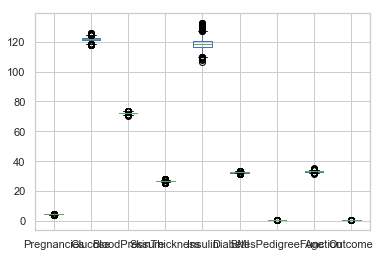

In [123]:
plt.figure(figsize=(67,50))

df_means.plot.box()

In [124]:
# if we chose 5th and 95th percentile, we are eliminating 5% data on left and 5% data on right. 
# Total we are eliminating 10% of the data. We need to eliminate 5% of the data 
# We need to use the range 0.025 to 0.975 to elimiate 2.5% data on left and 2.5% data on right

confidence_interval = df_means.quantile([0.05 - 0.025, 0.95 + 0.025])

In [125]:
confidence_interval

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0.025,4.193342,119.546528,71.401801,25.938316,112.266777,31.973744,0.449001,32.428353,0.316406
0.975,4.615923,123.855347,73.112465,27.295467,125.360762,32.950781,0.495334,34.079427,0.382812


In [126]:
lower_interval = confidence_interval.iloc[0,0]
upper_interval = confidence_interval.iloc[1,0]

print(lower_interval, upper_interval)

4.193341996934684 4.615922546386727


In [127]:
lower_interval = confidence_interval.iloc[0,1]
upper_interval = confidence_interval.iloc[1,1]

print(lower_interval, upper_interval)

119.54652837117513 123.85534680684408


In [128]:
df.mean().iloc[1]

121.68160502115886

In [129]:
df.mean().iloc[0]

4.400782267252609

In [130]:
if df.mean().iloc[0] >= lower_interval and df.mean().iloc[0] <= upper_interval:
    print('The true mean {} is between the confidence interval of {} and {}'.format(df.mean().iloc[0], confidence_interval.iloc[0,0], confidence_interval.iloc[1,0]))

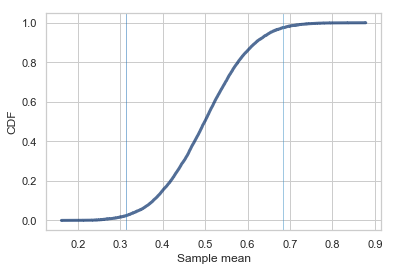

In [206]:
def SimulateSample(mu=0, sigma=1, n=10, iters=1000):
    xbars = []
    for _ in range(iters):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        xbars.append(xbar)
    return xbars

xbars = SimulateSample(mu=0.5, sigma=np.sqrt(0.09), n=10, iters=10000)

cdf = thinkstats2.Cdf(xbars)
thinkplot.Cdf(cdf)
thinkplot.axvline(cdf.ConfidenceInterval(95)[0])
thinkplot.axvline(cdf.ConfidenceInterval(95)[1])
thinkplot.Config(xlabel='Sample mean',
                 ylabel='CDF')

#fig, ax = plt.subplots(figsize=(18,10)) # figsize in inches
#sns.distplot(df_means, rug=True)
#sns.boxplot(data=df_means, orient="h", notch=True)

#wierd
#x1 = [lower_interval, upper_interval]
#x2 = [0.0, 0.0]    

#ax.plot(x1, x2, 'red', linestyle='--', marker='o', lw=3)


#y1 = [df.mean().iloc[0], df.mean().iloc[0]]
#y2 = [0.0, 0.0]


#ax.plot(y1, y2, 'green ', linestyle='--', marker='o', lw=3)

In [141]:
#from scipy import stats

In [194]:
# Calculate Confidence intervals when Population variance is known using z-score (normal distribution)

#mean, sigma = df.mean().iloc[4], 15000

# Sample standard error
#standard_error = stats.sem(data_frame)[0] #sem = standard error of means

#population standard error
#standard_error = sigma / np.sqrt(len(df))

#conf_int = stats.norm.interval(0.95, loc=mean, scale=standard_error)

In [195]:
#conf_int

In [144]:
n, p = 15, .9  # number of trials, probability of each trial
sample_binomial = np.random.binomial(n, p, 1000)

In [145]:
binomial_cdf = thinkstats2.Cdf(sample_binomial)

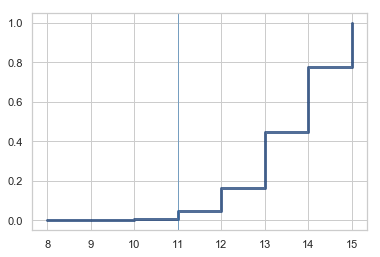

In [146]:
thinkplot.Cdf(binomial_cdf)
thinkplot.axvline(11)

In [147]:
binomial_cdf.Prob(11)

0.047

In [148]:
# Analytic method
from scipy.stats import binom
binom.cdf(11, n, p, loc=0)

0.055555630007535994

In [149]:
from scipy.stats import bernoulli


class BinomialTest(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        success, failure = data
        total = success + failure
        
        test_stat = success / total
        
        return test_stat
    
    # generate samples under null model
    def RunModel(self): 
        success, failure = self.data
        total = success + failure
        
        sample_bernoulli = bernoulli.rvs(0.9, size=total)
        
        sample_success = sum(sample_bernoulli)
        sample_failure = total - sample_success
        
        data = sample_success, sample_failure
        
        return data

    def PValue(self, iters=1000):
        """Computes the distribution of the test statistic and p-value.

        iters: number of iterations

        returns: float p-value
        """
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]
        self.test_cdf = thinkstats2.Cdf(self.test_stats)

        
        
        
        count = sum(1 for x in self.test_stats if x <= self.actual) 
        return count / iters

In [150]:
data = 11, 4
ct = BinomialTest(data)
pvalue = ct.PValue()
pvalue

0.047

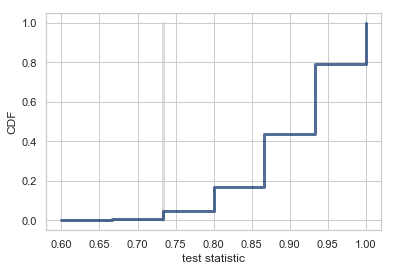

In [151]:
ct.PlotCdf()
thinkplot.Config(xlabel='test statistic',
                   ylabel='CDF')

In [152]:
class PropChiTest(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):    
        observed = data
        n = sum(observed)
        
        expected = [0.9 * n, (1-0.9)*n]
        
        test_stat = sum((observed - np.array(expected))**2 / expected) # chi squared statistic
        return test_stat

    # generate samples under null model
    def RunModel(self): 
        observed = self.data
        n = sum(observed)
        
        sample_bernoulli = bernoulli.rvs(0.9, size=n)
        
        sample_success = sum(sample_bernoulli)
        sample_failure = n - sample_success
        
        data = sample_success, sample_failure
        
        return data

In [177]:
data = 11, 5
ct = PropChiTest(data)
pvalue = ct.PValue()
pvalue

0.014

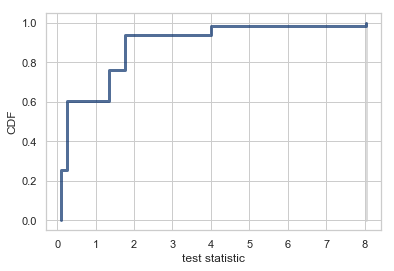

In [178]:
ct.PlotCdf()
thinkplot.Config(xlabel='test statistic',
                   ylabel='CDF')

In [155]:
# import thinkbayes2
#import thinkplot
#import csv
#import numpy as np
#import matplotlib.pyplot as plt

#from IPython.core import page
#page.page = print

In [156]:
#FORMATS = ['pdf']

In [157]:
#def ReadData(filename='C:\\Users\\Hitesh Sharma\\Desktop\\diabetes.csv'):
 #   """Reads a CSV file of data.
#
 #   Args:
  #    filename: string filename

   # Returns: sequence of (price1 price2 bid1 bid2 diff1 diff2) tuples
 #   """
  #  fp = open(filename)
   # reader = csv.reader(fp)
    #res = []

#    for t in reader:
 #       _heading = t[0]
  #      data = t[1:]
   #     try:
    #        data = [int(x) for x in data]
     #       # print heading, data[0], len(data)
      #      res.append(data)
       # except ValueError:
        #    pass

   # fp.close()
   # return list(zip(*res))

In [158]:
#class Player(object):
 #   """Represents a player on The Price is Right."""

    # below 2 lines are used for convering a pdf to a pmf
    # we are taking a continuos pdf which contains the prices 
    # and converting it to a pdf. we are passing buckets in the range of xs    
    # `linspace` stands for “linear space.” It takes a range,
    # `low` and `high`, and the number of points,
    # `n`, and returns a new `numpy` array with
    # `n` elements equally spaced between `low` and
    # `high`, including both.    
  #  n = 101
   # price_xs = np.linspace(0, 75000, n)
    
   # def __init__(self, prices, bids, diffs):
    #    """Construct the Player.

     #   prices: sequence of prices
      #  bids: sequence of bids
       # diffs: sequence of underness (negative means over)
        #"""
        # pdf_price is a `Pdf` object, estimated by KDE.
       # self.pdf_price = thinkbayes2.EstimatedPdf(prices)
       # self.cdf_diff = thinkbayes2.MakeCdfFromList(diffs)

        #mu = 0 # player guesses are 0+- sigma off 
        #sigma = np.std(diffs)
        #self.pdf_error = thinkbayes2.NormalPdf(mu, sigma)

#    def ErrorDensity(self, error):
 #       """Density of the given error in the distribution of error.
#
 #       error: how much the bid is under the actual price
  #      """
   #     return self.pdf_error.Density(error)
#
 #   def PmfPrice(self):
  #      """Returns a new Pmf of prices.
#
 #       A discrete version of the estimated Pdf.
  #      """
   #     #pproximates the Pdf by evaluating the density at a
    #    # sequence of equally spaced values.
     #   return self.pdf_price.MakePmf(xs=self.price_xs)

#    def CdfDiff(self):
 #       """Returns a reference to the Cdf of differences (underness).
  #      """
   #     return self.cdf_diff
#
 #   def ProbOverbid(self):
  #      """Returns the probability this player overbids.
   #     diff = price - bid
    #    If bid is greater than price, player looses and the diff will be negative.
     #   Here we are using historical price diffs, not data specific to this player.
      #  So, this probability is for all players overbidding.
       # 
        #Since the cdf remains the same, and -1 remains the same, so the probability
    #    of all players overbidding remains the same.
     #   """
        # We get the cumulative probabilities of diffs < -1. This is the
        # probability that all the players will overbid.
        
        # We are not calculating till 0 because there is an assymetric
        # risk to reward. If the diff is 0, you have exactly gussed the
        # price and you win both showcases, which is the ideal. If you
        # go above by even $1 you loose everything
      #  return self.cdf_diff.Prob(-1)

#    def ProbWorseThan(self, diff):
 #       """Probability this player's diff is greater than the given diff.

  #      diff: how much the oppenent is off by (always positive)
   #     """
        
        # We want to calculate this players diff is greater than a value
        # First we calculate the probability that its worse than that value
        # then subtract it from 1 to get the RHS area of cdf
        # imaging the cdf. We get a diff value on the x axis, we want to calculate
        # the area from that diff value till +infinity
    #    return 1 - self.cdf_diff.Prob(diff)

    #def MakeBeliefs(self, guess):
     #   """Makes a posterior distribution based on estimated price.

      #  Sets attributes prior and posterior.

       # guess: what the player thinks the showcase is worth        
        #"""
        
        # make the pmf from the read historical prices
        #pmf = self.PmfPrice()
        
        # Initialize a Price object. Pass the above Pmf. This is the prior.
        # The prior is a pmf of historical prices
        #self.prior = Price(pmf, self, label='prior')        
       
        #self.posterior = self.prior.Copy(label='posterior')
        #self.posterior.Update(guess) #posterior is a pmf, we update it

#    def OptimalBid(self, guess, opponent):
 #       """Computes the bid that maximizes expected return.
  #      
#        guess: what the player thinks the showcase is worth 
 #       opponent: Player

  #      Returns: (optimal bid, expected gain)
   #     """
    #    # player will give a guess. It will update the prior with the likelyhood of the guess
        # to produce a posterior
   #     self.MakeBeliefs(guess)
    #    calc = GainCalculator(self, opponent)
     #   bids, gains = calc.ExpectedGains()
     #   gain, bid = max(zip(gains, bids))
      #  return bid, gain

 #   def PlotBeliefs(self, root):
  #      """Plots prior and posterior beliefs.
#
 #       root: string filename root for saved figure
  #      """
   #     thinkplot.Clf()
    #    thinkplot.PrePlot(num=2)
     #   thinkplot.Pdfs([self.prior, self.posterior])
        
      #  '''
       # thinkplot.Save(root=root,
        #            xlabel='price ($)',
         #           ylabel='PMF',
          #          formats=FORMATS)
#        '''

In [159]:
#def MakePlayers():
 #   """Reads data and makes player objects."""
  #  data = ReadData(filename='C:\\Users\\Hitesh Sharma\\Desktop\\diabetes.csv')
   # data += ReadData(filename='C:\\Users\\Hitesh Sharma\\Desktop\\diabetes.csv')

#    cols = zip(*data)
 #   price1, price2, bid1, bid2, diff1, diff2 = cols

    #print(list(sorted(price1)))
    #print(len(price1))
    # price1 - Price Shown to players 1
    # bid1 - bids made by players 1 for that price1
    # diff1 = difference between price1 - bid1. See the csv file for order of subtraction.

#    player1 = Player(price1, bid1, diff1)
 #   player2 = Player(price2, bid2, diff2)

  #  return player1, player2

In [160]:
#def MakePlotsPmf(player1, player2):
 #   """Generates two plots.
#
 #   price1 shows the priors for the two players
  #  price2 shows the distribution of diff for the two players
   # """

    # plot the prior distribution of price for both players
#    thinkplot.Clf()
 #   thinkplot.PrePlot(num=2)
  #  pmf1 = player1.PmfPrice()
   # pmf1.label = 'showcase 1'
#    pmf2 = player2.PmfPrice()
 #   pmf2.label = 'showcase 2'
  #  thinkplot.Pdfs([pmf1, pmf2])
    
   # '''
    #thinkplot.Save(root='price1',
     #           xlabel='price ($)',
      #          ylabel='PDF',
       #         formats=FORMATS)
   # '''

In [203]:
# NAVIGATION 1
#player1, player2 = MakePlayers()
#MakePlotsPmf(player1, player2)
#plt.legend();

In [164]:
# format the book
import sys
sys.path.insert(0,'../LIBRARY')

In [165]:

import LIBRARY.thinkbayes2

In [166]:
# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

In [167]:
class BayesTable(pd.DataFrame):
    def __init__(self, hypothesis, prior=1):
        columns = ['hypothesis', 'prior', 'likelihood', 'unnormalized', 'posterior']
        super().__init__(columns=columns)
        self.hypothesis = hypothesis
        self.prior = prior
    
    def multiply(self):
        self.unnormalized = self.prior * self.likelihood
        
    def normalize(self):
        nc = np.sum(self.unnormalized)
        self.posterior = self.unnormalized / nc
        return nc
    
    def update(self):
        self.multiply()
        return self.normalize()
    
    def reset(self):
        return BayesTable(self.hypothesis, self.posterior)

In [168]:
table = BayesTable(['BloodPressure', 'Outcome'])

,hypothesis,prior,likelihood,unnormalized,posterior
0,BloodPressure,1,NaN,NaN,NaN
1,Outcome,1,NaN,NaN,NaN


In [169]:
table.likelihood = [3/4, 1/2]
table

,hypothesis,prior,likelihood,unnormalized,posterior
0,BloodPressure,1,0.75,NaN,NaN
1,Outcome,1,0.50,NaN,NaN


In [170]:
table.multiply()
table

,hypothesis,prior,likelihood,unnormalized,posterior
0,BloodPressure,1,0.75,0.75,NaN
1,Outcome,1,0.50,0.50,NaN


In [171]:
table.normalize()

1.25

In [172]:
table

,hypothesis,prior,likelihood,unnormalized,posterior
0,BloodPressure,1,0.75,0.75,0.6
1,Outcome,1,0.50,0.50,0.4


In [173]:
table2 = table.reset()

,hypothesis,prior,likelihood,unnormalized,posterior
0,BloodPressure,0.6,NaN,NaN,NaN
1,Outcome,0.4,NaN,NaN,NaN


In [174]:
table2.likelihood = [1/4, 1/2]

In [175]:
table2.update()

0.35

In [176]:
table2

,hypothesis,prior,likelihood,unnormalized,posterior
0,BloodPressure,0.6,0.25,0.15,0.428571
1,Outcome,0.4,0.50,0.20,0.571429
